In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from datetime import datetime, timedelta
from scipy import optimize, stats

import distributions as dist
import cumulative_distributions as cumdist
import histograms as hist

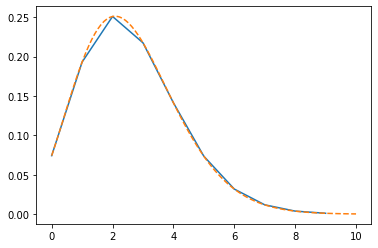

In [2]:
mu = 2.6  # poisson parameter

# discrete probability density
x = np.arange(10)
y = stats.poisson.pmf(x, mu)

# continuos probability density
xc = np.linspace(0, 10, num=100)
yc = dist.poisson(xc, mu)


# create Figure and Axis to plot
fig = plt.figure()
ax = fig.add_subplot(111)

# plot discrete distribution
ax.plot(x, y)
# plot continuos distribution
ax.plot(xc, yc, linestyle='--')

# show generated Figure and Axis
plt.show()

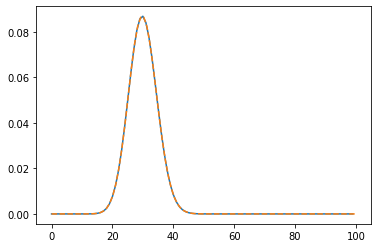

In [3]:
n, p = 100, 0.3  # binomial parameters

# discrete sampling
x = np.arange(n)
y = stats.binom.pmf(x, n, p)

# continuous sampling
xc = np.linspace(0, n, num=100)
yc = dist.binom(xc, n, p)


# create Figure and Axis
fig = plt.figure()
ax = fig.add_subplot(111)

# plot of discrete sampling
ax.plot(x, y)
# plot of continuos sampling
ax.plot(xc, yc, linestyle='--')

# show plot
plt.show()

In [4]:
# load ohlc data
df = pd.read_csv('data/AAPL.csv')
df = df.dropna()

# generate index
df['Date'] = [datetime.strptime(date, '%Y-%m-%d') for date in df['Date'].values]
df = df.set_index('Date')

1.5153220091815753 2.484226643398668 2.8939826442144225


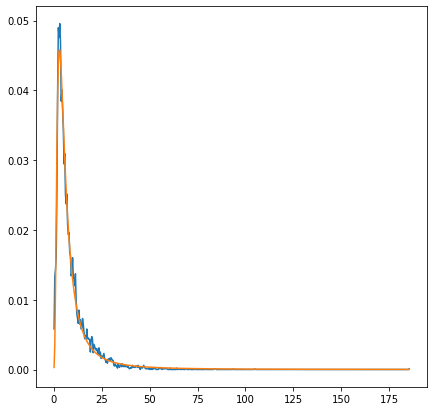

In [14]:
# variables
data = df['Volume'].values / 1e7
plotcum = False
nbins = 500


# generate histogram data
freq, bin_edges = np.histogram(data, bins=nbins)

# calculate real bins and probabilities
bins = 0.5 * (bin_edges[:-1] + bin_edges[1:])  # each bin is the avg of the edges.
prob = freq / np.sum(freq)

# fit probability density
args, pcov = hist.fit(dist.dagum, bin_edges, prob, [1.53, 2.64, 2.75])
print(*args)


# create Figure and Axis
fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(111)

if(plotcum is True):
    ax.plot(bins, cumprob = np.cumsum(prob))  # plot original cumulative probabilities
    cumfit = cumdist.dagum(bins, *popt)
    ax.plot(bins, cumfit)  # plot fitted probability distribution
else:
    ax.plot(bins, prob)  # plot original probabilities
    
    values = hist.bin_values(dist.dagum, args, bin_edges)  # calculate fitted distribution values
    ax.plot(bins, values)  # plot fitted probability distribution

# show plot
plt.show()